# <div align="center"><b> RAG LANGCHAIN EXAMPLE </b></div>

<div align="right">📝 <em><small><font color='Gray'>Nota:</font></small></em></div>

<div align="right"> <em><small><font color='Gray'> La funcionalidad de visualización de jupyter notebooks en <a href="https://github.com/" target="_blank">github</a> es solamente un preview.</font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Para mejor visualización se sugiere utilizar el visualizador recomendado por la comunidad: <a href="https://nbviewer.org/" target="_blank">nbviewer</a></font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Puedes a acceder al siguiente enlace para ver este notebook en dicha página: <a href="https://nbviewer.org/github/brunomaso1/uba-mia/blob/mia-nlp2/mia-nlp2/Ejemplos/rag-langchain-example.ipynb">NLP2 - Practico 2</a></font></small></em> </div>

* * *

<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>

<!-- Colab -->
<!-- <div align="center"><img src="https://drive.google.com/uc?export=view&id=1QSNrTsz1hQbmZwpgwx0qpfpNtLW19Orm" width="600" alt="Figura 1: A data scientist is working on word generation using the Lord of the Rings lore. The image is dark and moody, with a focus on the scientist's computer screen. The screen displays a visualization the one ring, with a map of Middle Earth in the background. - Generada con DALL-E3"></div> -->

<div align="center"><img src="../resources/img1.jpeg" width="600" alt="Figura 1: A data scientist is sitting in front of a computer screen, intently focused on the task at hand. The room is dimly lit, with the only light coming from the computer screen. The neural network is displayed on the screen, with the data scientist working to. The nerual network is deepseek R1. - Generada con Microsoft Image Creator"></div>

<div align="center"><small><em>Figura 1: A data scientist is sitting in front of a computer screen, intently focused on the task at hand. The room is dimly lit, with the only light coming from the computer screen. The neural network is displayed on the screen, with the data scientist working to. The nerual network is deepseek R1. - Generada con Microsoft Image Creator</em></small></div>

<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | RAG Langchain example                                                                                                                  |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | RAG + Langchain + Langgraph                                                                                                            |
| **Integrantes** | Bruno Masoller (brunomaso1@gmail.com)                                                                                                  |

</div>

🛻 <em><font color='MediumSeaGreen'>  Instalaciones: </font></em> 🛻

In [15]:
%pip install --upgrade jupyter ipywidgets
%pip install transformers torch einops
%pip install sentence-transformers
%pip install huggingface_hub[hf_xet]
%pip install langchain langchain-community langchain-pinecone pypdf langchain-groq langchain-huggingface
%pip install -U langgraph 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋

In [16]:
import os
import time
from dotenv import load_dotenv

# Pinecone
from pinecone import Pinecone, ServerlessSpec

# LangChain - Document Loaders
from langchain.document_loaders import PyPDFDirectoryLoader

# LangChain - Text Splitters
from langchain_text_splitters import RecursiveCharacterTextSplitter

# LangChain - Vector Stores
from langchain_pinecone import PineconeVectorStore

# LangChain - Embeddings
from langchain_community.embeddings import JinaEmbeddings

# LangChain - Chains
from langchain.chains import create_retrieval_chain, create_history_aware_retriever
from langchain.chains.combine_documents import create_stuff_documents_chain

# LangChain - Prompts
from langchain_core.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

# LangChain - Chat Models
from langchain_groq import ChatGroq

# LangChain - Memory
from langchain.memory import ChatMessageHistory, ConversationBufferMemory

# LangChain - Messages
from langchain_core.messages import AIMessage, HumanMessage

import os
import time
from pprint import pprint

import streamlit as st
from dotenv import load_dotenv

from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore

from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_community.embeddings import JinaEmbeddings

from langchain_text_splitters import RecursiveCharacterTextSplitter

from langchain_groq import ChatGroq

from langchain_core.embeddings import Embeddings
from langchain_core.language_models.chat_models import BaseChatModel
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain_core.runnables.base import Runnable

from langchain.chains import create_history_aware_retriever
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.retrieval import create_retrieval_chain

from typing_extensions import List, TypedDict
from langchain_core.documents import Document

from langgraph.graph import START, StateGraph

from langgraph.graph import MessagesState, StateGraph
from langchain_core.tools import tool
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display
from langgraph.prebuilt import create_react_agent

🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧


In [17]:
load_dotenv()

GROQ_API_KEY = os.getenv("GROQ_API_KEY")
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
JINA_AI_API_KEY = os.getenv("JINA_AI_API_KEY")
EMBEDDINGS_DIMENSION = 1024
EMBEDDINGS_MODEL = "jina-embeddings-v3"
GROQ_MODEL = "llama-3.3-70b-versatile"
INDEX_NAME = "rag-langchain-example"
NAMESPACE = "rag-langchain-example"
DOCUMENTS_DIRECTORY_PATH = "../resources/cv/"

## Consinga

- Mostrar un ejemplo de RAG con Langchain y Langgraph.

## Resolución

Partiendo de la base del [Práctico 1](../Practico%201/research.ipynb), se realiza una implementación de RAG utilizando Langchain y Langgraph.

### Sin tools
<small><em>https://python.langchain.com/docs/tutorials/rag/</em></small>

Utilizamos las funciones anteriores:

In [ ]:
def load_documents() -> list:
    loader = PyPDFDirectoryLoader(path=DOCUMENTS_DIRECTORY_PATH, mode="single")
    documents = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=200,
        chunk_overlap=50,
        separators=["\n\n", "\n", "(?=\\.)", " ", ""],
        length_function=len,
    )
    return text_splitter.split_documents(documents)


def get_vector_store(text_embeddings: Embeddings) -> PineconeVectorStore:
    vector_store = None
    pc = Pinecone(api_key=PINECONE_API_KEY)

    if not pc.has_index(INDEX_NAME):
        chunks = load_documents()

        pc.create_index(
            name=INDEX_NAME,
            vector_type="dense",
            dimension=1024,
            metric="cosine",
            spec=ServerlessSpec(cloud="aws", region="us-east-1"),
            deletion_protection="disabled",
            tags={"environment": "development"},
        )
        # Espera activa hasta que el índice esté listo
        while not pc.describe_index(INDEX_NAME).status["ready"]:
            time.sleep(1)

        vector_store = PineconeVectorStore.from_documents(
            documents=chunks,
            embedding=text_embeddings,
            index_name=INDEX_NAME,
            namespace=NAMESPACE,
        )

        # Verificamos la cantidad de documentos
        index = pc.Index(INDEX_NAME)
        if index.describe_index_stats(namespace=NAMESPACE)["total_vector_count"] == 0:
            raise ValueError("No se encontraron documentos en el índice. Verifique la carpeta de documentos.")

    if vector_store is None:
        vector_store = PineconeVectorStore.from_existing_index(
            embedding=text_embeddings, index_name=INDEX_NAME, namespace=NAMESPACE
        )

    return vector_store

Inicializamos LLM, embeddings y vectorstore:

In [19]:
chat = ChatGroq(groq_api_key=GROQ_API_KEY, model_name=GROQ_MODEL)
text_embeddings = JinaEmbeddings(
    jina_api_key=JINA_AI_API_KEY, model_name=EMBEDDINGS_MODEL
)

vector_store = get_vector_store(text_embeddings=text_embeddings)

In [ ]:
index

In [ ]:
pc = Pinecone(api_key=PINECONE_API_KEY)
index = pc.Index(INDEX_NAME)
index.
for ids in index.list(namespace=NAMESPACE):
    print(ids)
# documents = index.fetch(namespace=NAMESPACE)
# print(documents)

In [ ]:
index.describe_index_stats(namespace=NAMESPACE).total_vector_count

62

RAG:

In [21]:
prompt = """
Eres un asistente para tareas de preguntas y respuestas. Usa las siguientes piezas de contexto recuperado para responder la pregunta. Si no sabes la respuesta, simplemente di que no la sabes. Usa un máximo de tres oraciones y mantén la respuesta concisa.
Pregunta: {input} 
Contexto: {context} 
Respuesta:
"""

qa_prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessagePromptTemplate.from_template(prompt),
    ]
)

# Test prompt
test_prompt = qa_prompt.invoke({"input": "(entrada usuario)", "context": "(contexto)"}).to_messages()
print(test_prompt[0].content)


Eres un asistente para tareas de preguntas y respuestas. Usa las siguientes piezas de contexto recuperado para responder la pregunta. Si no sabes la respuesta, simplemente di que no la sabes. Usa un máximo de tres oraciones y mantén la respuesta concisa.
Pregunta: (entrada usuario) 
Contexto: (contexto) 
Respuesta:



Langgraph:

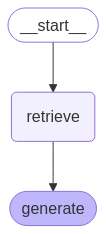

In [22]:
class State(TypedDict):
    input: str
    context: List[Document]
    answer: str

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(
        state["input"], k=3, namespace=NAMESPACE
    )
    return {'context': retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = qa_prompt.invoke({"input": state["input"], "context": docs_content})
    response = chat.invoke(messages)
    return {"answer": response.content}

grap_builder = StateGraph(State)
grap_builder.add_sequence([retrieve, generate])
grap_builder.add_edge(START, "retrieve")
graph = grap_builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

Testing:

In [23]:
result = graph.invoke({"input": "¿Cuáles son los lenguajes de programación más utilizados en el CV?"})

print(f"Contexto: {result['context']}")
print(f"Respuesta: {result['answer']}")

Contexto: [Document(id='97a2f976-24e6-4521-8eb5-169e228680d8', metadata={'author': 'Bruno Masoller', 'creationdate': '2025-04-08T18:48:43-03:00', 'creator': 'Microsoft® Word para Microsoft 365', 'moddate': '2025-04-08T18:48:43-03:00', 'producer': 'Microsoft® Word para Microsoft 365', 'source': '..\\resources\\cv\\CV Bruno Masoller - Detallado.pdf', 'total_pages': 4.0}, page_content='• Ingeniería de software \n• MLOps \n• SQL \n• Python \n• Java \n• Quarkus \n• Scikit-learn \n• SAP Process \nOrchestration \n• Angular \n• Typescript \n• Ionic \n \nINTERESES Y ÁREAS DE INVESTIGACIÓN:'), Document(id='10f3d8d8-a10b-4fa1-87b0-36fd3f1a8552', metadata={'author': 'Bruno Masoller', 'creationdate': '2025-04-08T18:48:43-03:00', 'creator': 'Microsoft® Word para Microsoft 365', 'moddate': '2025-04-08T18:48:43-03:00', 'producer': 'Microsoft® Word para Microsoft 365', 'source': '..\\resources\\cv\\CV Bruno Masoller - Detallado.pdf', 'total_pages': 4.0}, page_content='o Puesto: Data scientist. \no Cara

Testing paso a paso:

In [ ]:
for step in graph.stream(
    {"input": "¿Cuáles son los lenguajes de programación más utilizados en el CV?"},
    stream_mode="updates",
):
    print(f"{step}\n----------------\n")

### Con tools

El objetivo es utilizar una `tool` para buscar en el vectorstore y luego utilizar un LLM para responder a la pregunta. Para ello, utilizamos el módulo de agentes de LangChain.
Un RAG de este tipo, se puede representar el estado de nuestra aplicación mediante una secuencia de mensajes. En concreto, tendremos:

1. Entrada del usuario como un `HumanMessage`;
2. Consulta de almacén vectorial como un `AIMessage` con llamadas a herramientas;
3. Documentos recuperados como un `ToolMessage`;
4. Respuesta final como un `AIMessage`.

Creamos el estado para representar nuestro RAG:

> 📝 <em><font color='Gray'>Nota:</font></em> La clase `MessageState` contiene un estado con una lista de mensajes en el campo `messages`. Lo mismo que:
>
> ```python
> class GraphState(TypedDict):
>     messages: Annotated[list[AnyMessage], add_messages]
> ```

In [ ]:
graph_builder = StateGraph(MessagesState)

Creamos la herramienta para buscar en el vectorstore:

- <small><em>https://python.langchain.com/docs/concepts/messages/#toolmessage</em></small>
- <small><em>https://python.langchain.com/docs/how_to/tool_artifacts/</em></small>
- <small><em>https://python.langchain.com/docs/concepts/tool_calling/</em></small>
- <small><em>https://langchain-ai.github.io/langgraph/how-tos/tool-calling/</em></small>
- <small><em>https://python.langchain.com/docs/how_to/tool_calling/</em></small>
- <small><em>https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/</em></small>

In [ ]:
@tool(response_format="content_and_artifact") # "content_and_artifact": indica que la respuesta debe incluir tanto el contenido como el artefacto
def retrieve(query: str):
    """Obtiene infrormación relevante del CV de un candidato a partir de una consulta."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

Probamos la herramienta:

In [ ]:
result = retrieve.invoke("¿Cuáles son los lenguajes de programación más utilizados en el CV?")
print(result)

Source: {'author': 'Bruno Masoller', 'creationdate': '2025-04-08T18:48:43-03:00', 'creator': 'Microsoft® Word para Microsoft 365', 'moddate': '2025-04-08T18:48:43-03:00', 'producer': 'Microsoft® Word para Microsoft 365', 'source': '..\\resources\\cvs_pdf\\CV Bruno Masoller - Detallado.pdf', 'total_pages': 4.0}
Content: • Ingeniería de software 
• MLOps 
• SQL 
• Python 
• Java 
• Quarkus 
• Scikit-learn 
• SAP Process 
Orchestration 
• Angular 
• Typescript 
• Ionic 
 
INTERESES Y ÁREAS DE INVESTIGACIÓN:

Source: {'author': 'Bruno Masoller', 'creationdate': '2025-04-08T18:48:43-03:00', 'creator': 'Microsoft® Word para Microsoft 365', 'moddate': '2025-04-08T18:48:43-03:00', 'producer': 'Microsoft® Word para Microsoft 365', 'source': '..\\resources\\cvs_pdf\\CV Bruno Masoller - Detallado.pdf', 'total_pages': 4.0}
Content: o Puesto: Data scientist. 
o Características: 
▪ Proyectos de Machine Learning. 
 
IDIOMAS: 
• Ingles. Avanzado, oral y escrito. 
• Portugués. Básico, oral y escrito. 


Creamos el grafo de LangGraph:

> 📝 <em><font color='Gray'>Nota:</font></em> Una buena estrategia de resolución es idear el grafo de ejecución para resolver los problemas. En este caso, consiste de tres nodos:
> 1. Un nodo de entrada que recibe la pregunta del usuario, y o se genera una query para el retriever o se responde directamente.
> 2. Un nodo retriever que busca en el vectorstore y devuelve los documentos relevantes.
> 3. Un nodo que genera la respuesta final a partir de los documentos recuperados y la pregunta original.

> 📝 <em><font color='Gray'>Nota:</font></em> Se puede utilizar `ToolNode` que permite ejecutar la herramienta y agregar el resultado como `ToolMessage` al estado.

In [ ]:
# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    messages = state["messages"]
    llm_with_tools = chat.bind_tools([retrieve])
    response = llm_with_tools.invoke(messages)
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
tools = ToolNode([retrieve])


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    messages = state["messages"]
    recent_tool_messages = []
    for message in reversed(messages):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "Eres asistente para tareas de preguntas y respuestas."
        "Usa los siguientes fragmentos de contexto recuperados para responder a la pregunta."
        "Si no sabes la respuesta, di que no la sabes."
        "\n\n"
        f"{docs_content}"
    )

    # Se filtran los mensajes para obtener solo los relevantes y no contaminar el contexto.
    conversation_messages = [
        message
        for message in messages
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = chat.invoke(prompt)
    return {"messages": [response]}

Creamos el grafo de LangGraph:

> 📝 <em><font color='Gray'>Nota:</font></em> Podemos hacer un manejo de la memoria utilizando `MemorySaver`. `LangGraph` maneja automáticamente las sesiones con una memoria "in-memory" con *checkpoint*. Simplemente se le pasa un objeto config a la ejecución, con un ID único para cada hilo.

In [ ]:
memory = MemorySaver()

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

Mostramos el grafo:

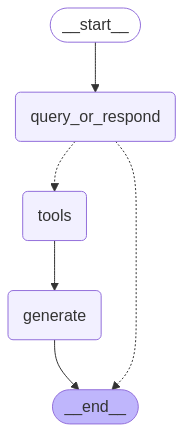

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

#### Test

Probamos el modelo (sin utilizar tools):

In [ ]:
input_message = "Hola!"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Hola!
================================== Ai Message ==================================

No hay ninguna función que deba ser llamada para esta consulta. ¿Hay algo más con lo que pueda ayudarte?


In [ ]:
input_message = "¿Cuáles son los lenguajes de programación más utilizados en el CV?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

¿Cuáles son los lenguajes de programación más utilizados en el CV?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_c5hg)
 Call ID: call_c5hg
  Args:
    query: lenguajes de programación más utilizados
================================= Tool Message =================================
Name: retrieve

Source: {'author': 'Bruno Masoller', 'creationdate': '2025-04-08T18:48:43-03:00', 'creator': 'Microsoft® Word para Microsoft 365', 'moddate': '2025-04-08T18:48:43-03:00', 'producer': 'Microsoft® Word para Microsoft 365', 'source': '..\\resources\\cvs_pdf\\CV Bruno Masoller - Detallado.pdf', 'total_pages': 4.0}
Content: • Ingeniería de software 
• MLOps 
• SQL 
• Python 
• Java 
• Quarkus 
• Scikit-learn 
• SAP Process 
Orchestration 
• Angular 
• Typescript 
• Ionic 
 
INTERESES Y ÁREAS DE INVESTIGACIÓN:

Source: {'author': 'Bruno Masoller', 'creationd

#### Inspeccionar historial

In [ ]:
# Podemos inspeccionar el historial de mensajes en cualquier momento
chat_history = graph.get_state(config).values["messages"]
for message in chat_history:
    message.pretty_print()

================================ Human Message =================================

Hola!
================================== Ai Message ==================================

No hay ninguna función que deba ser llamada para esta consulta. ¿Hay algo más con lo que pueda ayudarte?
================================ Human Message =================================

¿Cuáles son los lenguajes de programación más utilizados en el CV?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_c5hg)
 Call ID: call_c5hg
  Args:
    query: lenguajes de programación más utilizados
================================= Tool Message =================================
Name: retrieve

Source: {'author': 'Bruno Masoller', 'creationdate': '2025-04-08T18:48:43-03:00', 'creator': 'Microsoft® Word para Microsoft 365', 'moddate': '2025-04-08T18:48:43-03:00', 'producer': 'Microsoft® Word para Microsoft 365', 'source': '..\\resources\\cvs_pdf\\CV Bruno Masoller - Detalla

#### Agente RAG

- <small><em>https://python.langchain.com/docs/concepts/agents/</em></small>
- <small><em>https://langchain-ai.github.io/langgraph/how-tos/#prebuilt-react-agent</em></small>
- <small><em>https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/</em></small>
- <small><em>https://python.langchain.com/docs/tutorials/agents/</em></small>

Se puede utilizar un agente para que el modelo decida si utilizar la herramienta o no. Estos pueden ejecutar múltiples herramientas o pasos (por ejemplo, múltiples retrieves). La diferencia la implementación anterior es que hay un loop de invocación en vez de una secuencia lineal. El modelo puede elegir entre responder directamente o ejecutar una herramienta sucesivamente.

> ⚠️ <em><font color='gold'>Advertencia:</font></em> Esto hace que el modelo sea más propenso a alucinar, ya que puede ejecutar herramientas que no son necesarias y que su comportamiento sea menos predecible que una cadena fija establecida.

> 📝 <em><font color='Gray'>Nota:</font></em> El agente permite definir muchas herramientas que pueden ser administradas con `get_tools`:
> https://python.langchain.com/docs/concepts/tools/#toolkits

Creamos el agente:

In [ ]:
agent_executor = create_react_agent(chat, [retrieve], checkpointer=memory)

Mostramos el grafo:

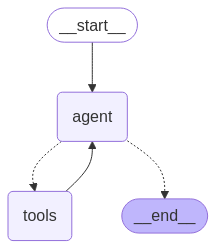

In [ ]:
display(Image(agent_executor.get_graph().draw_mermaid_png()))

Probamos el agente:

In [ ]:
config = {"configurable": {"thread_id": "def234"}}

input_message = "Hola! ¿Cuáles son los lenguajes de programación más utilizados en el CV? y ¿Que experiencia tiene el candidato en Python?"

for event in agent_executor.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hola! ¿Cuáles son los lenguajes de programación más utilizados en el CV? y ¿Que experiencia tiene el candidato en Python?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_d8zx)
 Call ID: call_d8zx
  Args:
    query: lenguajes de programación más utilizados
  retrieve (call_esqy)
 Call ID: call_esqy
  Args:
    query: experiencia en Python
================================= Tool Message =================================
Name: retrieve

Source: {'author': 'Bruno Masoller', 'creationdate': '2025-04-08T18:48:43-03:00', 'creator': 'Microsoft® Word para Microsoft 365', 'moddate': '2025-04-08T18:48:43-03:00', 'producer': 'Microsoft® Word para Microsoft 365', 'source': '..\\resources\\cvs_pdf\\CV Bruno Masoller - Detallado.pdf', 'total_pages': 4.0}
Content: • Operador Windows. Organización: Kompukon Informática. Fecha: 2002. 
 
HABILIDADES:
• Aprendizaje

### Limpieza

In [1]:
# Eliminamos el índice
pc = Pinecone(api_key=PINECONE_API_KEY)
try:
    pc.delete_index(INDEX_NAME)
    print(f"Índice {INDEX_NAME} eliminado correctamente.")
except Exception as e:
    print(f"Error al eliminar el índice {INDEX_NAME}: {e}")

# Listamos los índices restantes
pc.list_indexes()

NameError: name 'Pinecone' is not defined